In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import scipy
from scipy import stats

import seaborn as sns

# Estymacja

## Informacje wstępne

**Prostą próbą losową** (lub krócej próbą losową) o liczności $n$ nazywamy ciąg niezależnych zmiennych losowych $X_1, X_2, \ldots, X_n$ i takich, że każda ze zmiennych ma taki sam rozkład.

Ozn. **i.i.d** - independent and identically distributed random variables - niezależne zmienne losowe o takim samym rozkładzie.

**Statystyką** nazywamy zmienną losową będącą funkcją próby losowej $X_1, X_2, \ldots, X_n$.

**Estymatorem** nazywamy statystykę służąca do szacowania wartości parametru rozkładu.

#### Przykład

Statystyką jest np. średnia z próby, tzn.
$$T(X_1, X_2, \ldots, X_n) = \bar X = \frac{1}{n}\sum_{i=1}^{n} X_i.$$
Jest to funkcja próby losowej $X_1, X_2, \ldots, X_n$.

Często taka statystyka jest dobrym estymatorem wartości oczekiwanej $\mathbb{E} X$, jeśli próba pochodzi z tego samego rozkładu, co $X$.

### Nieobciążoność

Estymator $\hat \theta_n = \hat \theta(X_1, X_2, \ldots, X_n)$ parametru $\theta$ jest nieobciążony, jeśli $$\mathbb{E} \hat \theta_n = \theta.$$
Jest to porządana własność, bo oznacza, że średnio trafiamy w estymowany parametr (nie niedoszacowujemy i nie przeszacowujemy).

#### Przykład

Średnia jest nieobciążonym estymatorem wartości oczekiwanej.

Dowód: Musimy policzyć $\mathbb{E} \bar X$.

$$\mathbb{E} \bar X = \mathbb{E} \frac{1}{n}\sum_{i=1}^{n} X_i = \frac{1}{n}\mathbb{E}\sum_{i=1}^{n} X_i = 
\frac{1}{n}\sum_{i=1}^{n} \mathbb{E} X_i = \frac{1}{n}\sum_{i=1}^{n}\mathbb{E}X = \mathbb{E}X.$$

#### Przykład

Niech $X_1, X_2, \ldots, X_n$ będzie próbą losową z populacji o znanej wartości oczekiwanej $\mu = \mathbb{E}X$ i nieznanej skończonej wariancji $\sigma^2$. Sprawdzimy, że $s^2 = \frac{1}{n}\sum_{i=1}^{n} (X_i - \mu)^2$ jest nieobciążonym estymatorem $\sigma^2$.

Dowód: Policzymy $\mathbb{E}s^2$.

$$\mathbb{E}s^2 = \mathbb{E}\left(\frac{1}{n}\sum_{i=1}^{n} (X_i - \mu)^2 \right)= \frac{1}{n}\sum_{i=1}^{n} \mathbb{E}(X_i - \mu)^2 = \frac{1}{n}\sum_{i=1}^{n} \mathbb{E}(X - \mathbb{E}X)^2 = \sigma^2$$

#### Przykład 

W przypadku próby $X_1, X_2, \ldots, X_n$ z nieznaną wartością oczekiwaną i nieznaną wariancją, nieobciążonym estymatorem wariancji jest $$s^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar X)^2.$$

(PD) Pokazać, że faktycznie ten estymator jest nieobciążony.

### Zgodność

Estymator $\hat \theta_n = \hat \theta(X_1, X_2, \ldots, X_n)$ parametru $\theta$ nazywamy zgodnym, jeśli dla dowolnego $\varepsilon > 0$ zachodzi 
$$ \lim_{n\to\infty} P(|\hat \theta_n - \theta| > \varepsilon) = 0.$$
Zgodność oznacza, że jeśli będziemy zwiększać liczność próbki, to możemy z ustaloną dokładnością estymować parametr.

## Metody estymacji parametrów

Metody ułatwiające znalezienie odpowiedniego estymatora.

### Metoda momentów

 - Chcemy estymować $k$ parametrów.
 - Przedstawiamy $k$ momentów ($\mathbb{E}X^1, \mathbb{E}X^2, \ldots, \mathbb{E}X^k$) jako funkcja parametrów, które chcemy estymować.
 - Mamy układ równań ($k$ równań, $k$ niewiadomych).
 - Rozwiązujemy układ równań.
 - Za $\mathbb{E}X^j$ dla $j=1,2,\ldots,k$ wstawiamy $\frac{1}{n}\sum_{i}^n X_i^j$.
 
#### Przykład

Rozkład Pareto o parametrach $(\delta, \theta)$ ($\delta > 0$, $\theta > 0$) ma zadaną gęstość 
$$ f(x) = \theta \delta^{\theta} x^{-(\theta+1)} \textrm{ dla } x > \delta. $$
Policzymy estymatory $\delta$ i $\theta$ metodą momentów.

$$\mathbb{E} X = \int_{\delta}^{\infty} x f(x) dx = \theta \delta^{\theta} \int_{\delta}^{\infty} x^{-\theta} dx = \frac{\theta \delta}{\theta - 1} \textrm{ gdy } \theta>1 \textrm{(w przeciwnym wypadku nie istnieje)}$$

$$\mathbb{E} X^2 = \int_{\delta}^{\infty} x^2 f(x) dx = \theta \delta^{\theta} \int_{\delta}^{\infty} x^{-\theta + 1} dx = \frac{\theta \delta^2}{\theta - 2} $$

Po rozwiązaniu układu otrzymujemy 
$$\left\{ \begin{array}{l}
\theta = \sqrt{\frac{\mathbb{E} X^2}{\mathbb{E} X^2 - (\mathbb{E} X)^2}} + 1 \\
\delta = \mathbb{E} X\frac{\theta - 1}{\theta}
\end{array}\right.$$

Po wstawieniu $\mathbb{E} X = \frac{1}{n}\sum_{i}^n X_i$ i $\mathbb{E} X^2 = \frac{1}{n}\sum_{i}^n X_i^2$ otrzymujemy estymatory.

### Metoda największej wiarogodności (MNW, ENW, ML - maximum likelihood)

#### Funkcja wiarogodności

Niech $X_1, X_2, \ldots, X_n$ będzie próbą losową pochodzącą z rozkładu o parametrach $\theta = (\theta_1, \theta_2, \ldots, \theta_k)$. Zauważmy, że w przypadku gdy zmienne pochodzą z rozkładu ciągłego o gęstości $f = f_\theta$, to $f$ zależy od wartości $x$ i od parametrów $\theta$ (w przypadku dyskretnych gęstość należy wymienić na funkcję masy prawdopodobieństwa). Funkcja wiarogodności dla pojedynczej obserwacji jest równa gęstości, ale traktowana jest jako funkcja parametrów $\theta$ przy ustalonym $x$, tzn.:
$$L(\theta; x) = f_{\theta}(x).$$
Funkcja wiarogodności dla próby losowej wynosi
$$L(\theta; x_1, x_2, \ldots, x_n) = f_{\theta}^{joint}(x_1, x_2, \ldots, x_n) = \prod_{i=1}^n f_{\theta}(x_i),$$
gdzie $f_{\theta}^{joint}$ oznacza łączną gęstość całej próby $(X_1, X_2, \ldots, X_n)$ i ze względu na niezależność zmiennych faktoryzuje się.

#### Przykład

Niech $X_1, X_2, \ldots, X_n$ pochodzą z rozkładu normalnego $N(\mu, \sigma^2)$. Funkcja wiarogodności wynosi wtedy

$$L(\mu, \sigma^2; x_1, x_2, \ldots, x_n) = \prod_{i=1}^n f_{(\mu, \sigma^2)}(x_i) = \prod_{i=1}^n \left( \frac{1}{\sqrt{2 \pi} \sigma} \exp\left(-\frac{(x_i - \mu)}{2\sigma^2}\right) \right)
= \left(\frac{1}{\sqrt{2 \pi} \sigma}\right)^n \exp\left(-\frac{\sum_{i=1}^{n}(x_i - \mu)}{2\sigma^2}\right)$$
Logarytm funkcji iarogodności wynosi 
$$l(\mu, \sigma^2; x_1, x_2, \ldots, x_n) = \log\left(L(\mu, \sigma^2; x_1, x_2, \ldots, x_n)\right) = -n\log(\sqrt{2 \pi} \sigma) - \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{2\sigma^2}$$


**Estymatorem największej wiarogodności** parametrów $\theta$ nazywamy 
$\hat \theta = {\arg \max}_{\theta} L(\theta; x_1, x_2, \ldots, x_n).$

Musimy zatem znaleźć punkt, w którym funkcja największej wiarogodności przyjmuje maksimum.

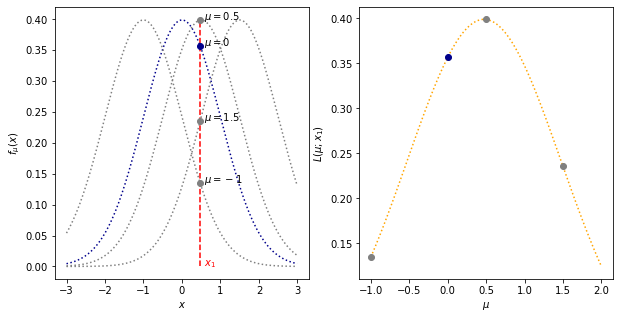

In [2]:
X = stats.norm(0, 1)
x1 = X.rvs(1, random_state=12)

x_grid = np.arange(-3, 3, 0.01)

f01 = X.pdf(x_grid)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(x_grid, f01, color="darkblue", linestyle=":")
plt.vlines(x1, 0, 0.4, color="red", linestyle="--")
plt.text(x1 + 0.1, X.pdf(x1), r'$\mu = 0$')
plt.plot(x1, X.pdf(x1), 'o', color="darkblue")
plt.text(x1 + 0.1, 0, r'$x_1$', color="red")

plt.plot(x_grid, stats.norm(1.5, 1).pdf(x_grid), color="grey", linestyle=":")
plt.text(x1 + 0.1, stats.norm(1.5, 1).pdf(x1), r'$\mu = 1.5$')
plt.plot(x1, stats.norm(1.5, 1).pdf(x1), 'o', color="grey")

plt.plot(x_grid, stats.norm(-1, 1).pdf(x_grid), color="grey", linestyle=":")
plt.text(x1 + 0.1, stats.norm(-1, 1).pdf(x1), r'$\mu = -1$')
plt.plot(x1, stats.norm(-1, 1).pdf(x1), 'o', color="grey")

plt.plot(x_grid, stats.norm(0.5, 1).pdf(x_grid), color="grey", linestyle=":")
plt.text(x1 + 0.1, stats.norm(0.5, 1).pdf(x1), r'$\mu = 0.5$')
plt.plot(x1, stats.norm(0.5, 1).pdf(x1), 'o', color="grey")

plt.xlabel(r'$x$')
plt.ylabel(r'$f_{\mu}(x)$')
#plt.show()

L = np.zeros(100)
mu_grid = np.linspace(start=-1, stop=2, num=100)
for i in range(100):
    L[i] = stats.norm(mu_grid[i], 1).pdf(x1)

plt.subplot(122)
plt.plot(mu_grid, L, linestyle=":", color="orange")
mu_example = [-1, 1.5, 0.5]
plt.plot(mu_example, [stats.norm(m, 1).pdf(x1) for m in mu_example], "o", color="grey")
plt.plot([0], stats.norm(0, 1).pdf(x1), "o", color="darkblue")
plt.xlabel(r'$\mu$')
plt.ylabel(r'$L(\mu; x_1)$')
plt.show()

#### Zadanie

Zaimplementuj logarytmiczną funkcję wiarygodności dla rodziny rozkładów normalnych.

In [3]:
def log_like_norm(mu, sigma2, x):
    return("uzupelnij")

In [4]:
def log_like_norm(mu, sigma2, x):
    n = len(x)
    result = -n*math.log(math.sqrt(2*math.pi*sigma2))-sum((x-mu)**2)/(2*sigma2)
    return(result)

In [5]:
def log_like_norm(mu, sigma2, x):
    
    # -n = len(x)
    
    agg = 0
    
    for i in x:
        agg += (i - mu)**2
    
    log = (- len(x) * np.log(np.sqrt(2 * np.pi * sigma2))) - (agg / (2 * sigma2))
    
    return log

#### Szukanie maksimum funkcji

 - (liczymy logarytm, żeby sobie ułatwić; logarytm to funkcja rosnąca, więc nie zmieni położenia maksimum)
 - liczymy pochodne
 - ekstrema (maksima, minima lokalne) są w punktach, w których pochodna zmienia znak, najłatwiej rozwiązywać $f' \geq 0 $ lub $f'=0$
 - liczymy drugą pochodną, jeśli jest dodatnia, to znaleźliśmy maksimum
 
W przypadku wielowymiarowym: 
 - http://www.math.ubc.ca/~malabika/teaching/ubc/spring11/math105/sec203/extrema.pdf
 - http://people.math.harvard.edu/~knill/teaching/summer2011/handouts/41-extrema.pdf
 - http://www.math.sci.hokudai.ac.jp/~s.settepanella/teachingfile/Calculus/Calculus1/pagine/lecture8.pdf

#### Przykład

Znajdźmy estymatory największej wiarogodności średniej i wariancji $(\mu, \sigma^2)$ w rozkładzie normalnym.

Mamy próbę prostą $X_1, X_2, \ldots, X_n$ pochodzą z rozkładu normalnego $N(\mu, \sigma^2)$ i funkcję log-wiarogodności dla tej próby:

$$l(\mu, \sigma^2; x_1, x_2, \ldots, x_n) = \log\left(L(\mu, \sigma^2; x_1, x_2, \ldots, x_n)\right) = -n\log(\sqrt{2 \pi} \sigma) - \frac{\sum_{i=1}^{n}(x_i - \mu)^2}{2\sigma^2} = c - \frac{n}{2}\log(\sigma^2) \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2$$

Policzmy pochodną po $\mu$ (korzystamy z tego, że $(x^2)'=2x$, $(f(g(x)))' = f'(g(x))g'(x))$:

$$\frac{\partial l(\mu, \sigma^2; x_1, x_2, \ldots, x_n)}{\partial \mu} = \frac{1}{\sigma^2}\sum_{i=1}^{n}(x_i - \mu) = \frac{n \bar x}{\sigma^2} - \frac{\mu}{\sigma^2}$$

Przyrównajmy do $0$:
$$\frac{n \bar x}{\sigma^2} - \frac{n\mu}{\sigma^2} = 0$$

Otrzymujemy $\mu = \bar x$, czyli estymator NW to $\hat \mu = \bar X$.

Policzmy pochodną po $\sigma^2$:

$$\frac{\partial l(\mu, \sigma^2; x_1, x_2, \ldots, x_n)}{\partial \sigma^2} = - \frac{n}{2}\frac{1}{\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(x_i - \mu)^2$$

Przyrównajmy do $0$:

$$-\frac{n}{2}\frac{1}{\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^{n}(x_i - \mu)^2 = 0$$
$$\sum_{i=1}^{n}(x_i - \mu)^2 = n\sigma^2$$
$$\frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2 = \sigma^2$$

Otrzymujemy $\sigma^2=\frac{1}{n}\sum_{i=1}^{n}(x_i - \mu)^2$, czyli estymator NW to $\hat \sigma^2=\frac{1}{n}\sum_{i=1}^{n}(X_i - \bar X)^2$.

(PD) Trzeba się jeszcze upewnić, że to maksimum (sprawdzić, czy warunki na drugie pochodne są spełnione - patrz linki wyżej).

#### Zadanie 

Wygenerować próbkę 100 obserwacji z rozkładu $N(0, 1)$. Następnie policzyć ENW dla obu parametrów (ręcznie i korzystając z funckji `stats.norm.fit`).

*Funkcja `stats.norm.fit` zwraca:
MLEs for any shape parameters (if applicable), followed by those for location and scale. For most random variables, shape statistics will be returned, but there are exceptions (e.g. norm).*

Następnie na wykresie funkcji log-wiarogodności zaimpementowany w poprzednim zadaniu zaznaczyć maksimum.

In [6]:
# Wygenerować próbkę 100 obserwacji z rozkładu  N(0,1). Następnie policzyć ENW dla obu parametrów.

X = stats.norm(0, 1)
x = X.rvs(100, random_state=123)
x_śr = sum(x)/len(x)
sigma2 = sum((x-x_śr)**2)/len(x)
sigma2, x_śr # estymatory NW (sigma^2, mu)

(np.mean(x), np.var(x))

(0.027109073490359778, 1.2729265592243306)

In [7]:
print(stats.norm.fit(x)) # korzystając z funkcji (mu, sigma)
(np.mean(x), np.std(x))

(0.027109073490359778, 1.128240470477961)


(0.027109073490359778, 1.128240470477961)

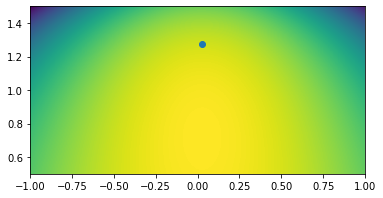

In [8]:
# Następnie na wykresie funkcji log-wiarogodności zaimpementowany w poprzednim zadaniu zaznaczyć maksimum
# tu wystarczy dorysować punkt

mu_seq = np.linspace(-1, 1, 200)
sigma2_seq = np.linspace(0.5, 1.5, 200)
log_like_values = [[log_like_norm(mu, sigma2, x) for mu in mu_seq] for sigma2 in sigma2_seq]

plt.imshow(log_like_values, extent=[-1, 1, 0.5, 1.5])
plt.plot(np.mean(x), np.var(x), "o")
plt.show()

#### Zadanie (estymatory końca przedziału w rozkładzie jednostajnym)

Mamy próbkę $X_1, X_2, \ldots, X_n$ pochodzącą z rozkładu jednostajnego $U([0, \theta])$, gdzie $\theta > 0$ jest nieznanym parametrem. Chcemy empirycznie porównać estymatory $\theta$ obliczone metodą momentów i metodą największej wiarogodności.

Mamy dane postaci tych estymatorów (jako PD można spróbować samodzielnie je wyprowadzić):

$$\hat \theta_{MM} = 2 \bar X$$

$$\hat \theta_{MNW} = \max\{X_1, X_2, \ldots, X_n\} = X_{(n)}$$

a) Sprawdzimy, czy są to estymatory nieobciążone.

 - ustalmy $\theta = 10$
 - wylosuj $n=100$ obserwacji z $U([0, \theta])$
 - policz oba estymatory
 - powtórz punkty 2 i 3 $N=100$ razy i zapisuj wartości estymatorów
 - Narysuj histogramy dla MM i MLE
 
Czy średnia z wartości estymatorów MM i MLE jest bliska $\theta = 10$?

In [9]:
theta = 10
n = 100
X = stats.uniform(0, theta) # tworzymy zm. losową
x = X.rvs(n)

estMM = 2*np.mean(x)
estMNW = np.max(x)
estMM, estMNW

# powtórzyć N razy i narysować histogramy estymatorów

(9.994035536989715, 9.780843388683314)

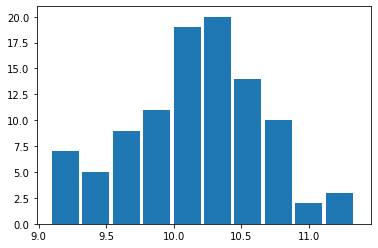

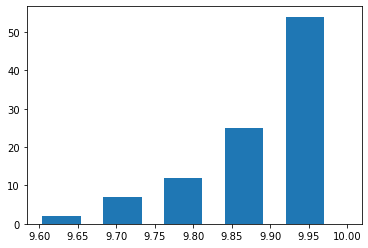

średnia estymatora MM 10.162962934811912, średnia estymatora MNW 9.906788300161018


In [10]:
theta = 10 
n = 100
X = stats.uniform(0, theta)
wynikiMM = []
wynikiMNW = []
for i in range(100):
    x = X.rvs(n)
    thetaMM = 2 *  x.mean()
    thetaMNW = x.max()
    wynikiMM.append(thetaMM)
    wynikiMNW.append(thetaMNW)

plt.figure()
plt.hist(wynikiMM, bins = 10, width=0.2)
plt.figure()
plt.hist(wynikiMNW, bins = 5, width=0.05)
plt.show()
print('średnia estymatora MM {}, średnia estymatora MNW {}'.format(np.array(wynikiMM).mean(), np.array(wynikiMNW).mean()))

In [11]:
# estymator MM - nieobciężony, estymator NW niedoszacowuje par. theta

b) Sprawdzimy, czy są to estymatory zgodne.

 - ustalmy $\theta = 10$
 - wylosuj $n$ obserwacji z $U([0, \theta])$
 - policz oba estymatory
 - powtórz punkty 2 i 3 wartości $n$ z siatki np. `n = np.arange(100, 10000, 100)` i zapisuj wartości estymatorów
 - narysuj wykres zależności wartości estymatorów od $n$
 
Czy wraz ze wzrostem $n$ wartości estymatorów MM i MLE zbliżają się do $\theta = 10$?

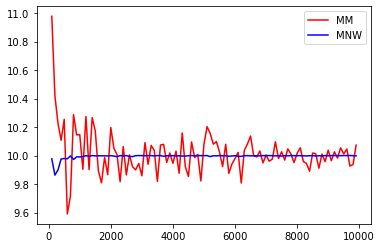

In [12]:
theta = 10 
X = stats.uniform(0, theta)
wynikiMM = []
wynikiMNW = []
for i in range(100, 10000, 100):
    x = X.rvs(i)
    thetaMM = 2 *  x.mean()
    thetaMNW = x.max()
    wynikiMM.append(thetaMM)
    wynikiMNW.append(thetaMNW)
    
    
plt.plot(np.arange(100, 10000, 100), wynikiMM, label='MM', color='red')
plt.plot(np.arange(100, 10000, 100), wynikiMNW, label='MNW', color='blue')
plt.legend()
plt.show()


Estymator największe wiarogodności jest zgodny, estymotor metody momentów, nie wiadomo, ale jeśli zbiega do theta, to na pewno dużo wolniej.

#### Zadanie - nieznany rozkład (PD)

Wczytaj dane `nieznany_rozklad.csv`. 

 - Narysuj histogram częstości i spróbuj odgadnąć, z jakiego rozkładu mogą te dane pochodzić? 
 - Następnie skorzystaj z funkcji `fit` z pakietu `stats` (ustaw parametry `floc=0`, `fscale=1`). 
 - Następnie nanieś na histogram teoretyczną gęstość z wyestymowanym parametrem.

`x = np.loadtxt("nieznany_rozklad.txt")`

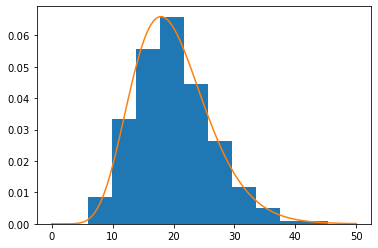

In [13]:
x = np.loadtxt("nieznany_rozklad.txt")

df_mle = stats.chi2.fit(data=x, floc=0, fscale=1)[0]

plt.hist(x, density=True)
x_seq = np.linspace(0, 50, 100)
plt.plot(x_seq, stats.chi2(df=df_mle).pdf(x_seq))
plt.show()

# Przedziały ufności

Wcześniejsze metody dotyczyły estymacji punktowej, tzn. dostawaliśmy szacowaną wartość parametru. Jednocześnie nie mogliśmy ocenić, na ile trafne są te oszacowania. W metodzie przedziałowej nie dostajemy dokładnej wartości, tylko przedział, za to możemy określić, z jakim prawdopodobieństwem parametr należy do danego przedziału.

Jeśli umiemy wskazać takie statystyki $a$ i $b$ niezależne od $\theta$, że wiemy, że
$$P(\theta \in (a_{\mathbb{X}}, b_{\mathbb{X}})) = 1 - \alpha,$$
to przedziałem ufności (CI - confidence interval) na poziomie $1 - \alpha$ jest $(a_{\mathbb{X}}, b_{\mathbb{X}})$; $\mathbb{X} = (X_1, X_2, \ldots, X_n)$.

Jak wida¢ z definicji końce przedziału ufności są  zmiennymi losowymi.
Nieznana wartość parametru może więc być pokryta przez ten losowy
przedział bądź nie.

Jeżeli jednak dla różnych zaobserwowanych próbek losowych $X_1, X_2, \ldots, X_n$
znajdziemy wiele realizacji przedziału ufności, to część z tych, które będą
zawierać rzeczywistą wartość parametru w dużej liczbie tych realizacji,
będzie w przybliżeniu równa $1 - \alpha$.

#### Przykład (przedziały ufności)

Znaleźć przedział ufności dla nieznanej wartości średniej $\mu$ populacji, w której badana cecha ma rozkład $N(\mu,\sigma)$, w przypadku gdy $\sigma$ jest znana, na podstawie $n$-elementowej próby prostej 
$$
X_1,\ldots,X_n.
$$

Wiemy, że statystyka 
$$
\bar X = \frac{1}{n} \sum_{i=1}^{n} X_i
$$
ma rozkład 
$$
N(\mu, \frac{\sigma}{\sqrt{n}}).
$$

Natomiast,  
$$
U = \frac{\bar X - \mu}{\sigma} \sqrt{n} 
$$
ma rozkład 
$$
N(0, 1).
$$

Dla danego $\alpha$ ($0<\alpha<1$) możemy znaleść takie wartości $u_1$ i $u_1$, aby
$$
P( u_1<U<u_2 ) = CDF(u_2) - CDF(u_1) = 1-\alpha.
$$

Aby dostać przedział, wystarczy w tym celu wybrać $\alpha_1$ i $\alpha_2$, takie, że spełniają one warunek:
$$
\alpha_1+\alpha_2 = \alpha, \qquad 0<\alpha_1<\alpha_1<\alpha
$$ 

i przyjąć
$$
u_1= \mathcal{Z}_{\alpha_1}, \qquad u_2= \mathcal{Z}_{1 - \alpha_2}
$$
czyli kwantyle rozkładu normalnego rzędu $\alpha_1$ i $1-\alpha_2$.

Wynika to z faktu, że
$$
CDF(\mathcal{Z}_{1 - \alpha_2}) - CDF(\mathcal{Z}_{\alpha_1}) = 1-\alpha_2 - \alpha_1 = 1-\alpha
$$

Więc
$$
P( u_1<U<u_2 ) = CDF(u_2) - CDF(u_1) = 1-\alpha.
$$

CDF - dystrybuanta, PPF - kwantyle

Widzimy, że nawet przy wykorzystaniu jednej statystyki $U$ do wyznaczania
szukanego przedziału ufności w zależności od wyboru wartości
$\alpha_1$ i $\alpha_2$ możemy utworzyć nieskończenie wiele przedziałów ufności.

Poniżej dla $\alpha_1=0.02$ i $\alpha_2=0.03$

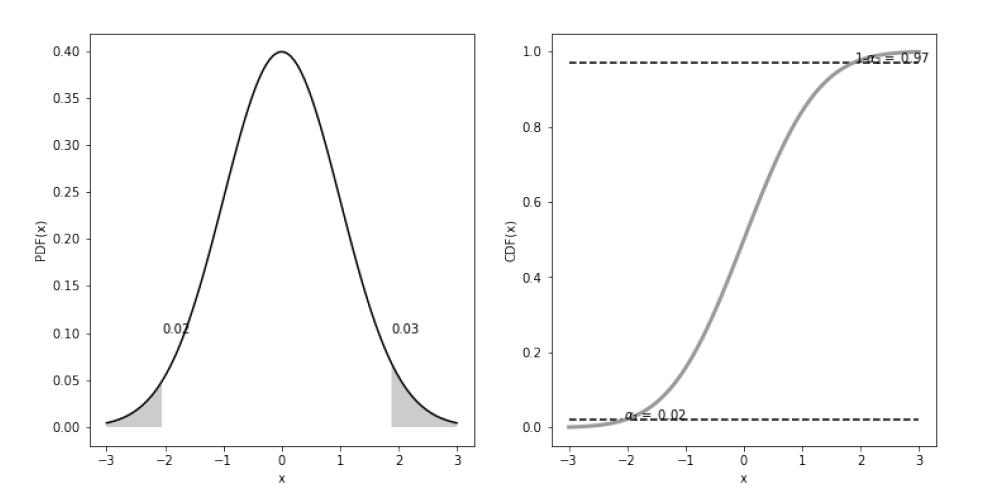

Jeśli chcemy dostać symetryczny przedział ufności, powinniśmy wybrać $u_1 = q_{\alpha/2} = - q_{1-\alpha/2}$, $u_1 = q_{1-\alpha/2}$, a wtedy 

$$P( - q_{1-\alpha/2} <U<q_{1-\alpha/2} ) = 1-\alpha$$

Pamiętamy, że $U = \frac{\bar X - \mu}{\sigma} \sqrt{n}$, więc 

$$P( - q_{1-\alpha/2} <\frac{\bar X - \mu}{\sigma} \sqrt{n}<q_{1-\alpha/2} ) = 1-\alpha$$ 

i po przekształceniu mamy

$$
\left( \bar X - PPF_{N(0, 1)}\left(1-\frac{\alpha}{2}\right) \frac{\sigma}{\sqrt{n}} , \bar X + PPF_{N(0, 1)}\left(1-\frac{\alpha}{2}\right) \frac{\sigma}{\sqrt{n}} \right).
$$

#### Zadanie - przedział ufności - r. normalny o znanej wariancji

Niech $\sigma=2$. Załóżmy, że w naszym zadaniu w $n=16$ próbach wypadło $\bar x = 34.1$.

Przyjmijmy współczynnik ufności $0.05$ wyznacz przedział największej wiarygodności.

Na podstawie wyprowadzenia powyżej wiemy, że przedział ufności dla nieznanej wartości średniej $\mu$ populacji, w której badana cecha ma rozkład $N(\mu,\sigma)$, w przypadku gdy $\sigma$ jest znana, to:

$$
\left( \bar X - PPF_{N(0, 1)}\left(1-\frac{\alpha}{2}\right) \frac{\sigma}{\sqrt{n}} , \bar X + PPF_{N(0, 1)}\left(1-\frac{\alpha}{2}\right) \frac{\sigma}{\sqrt{n}} \right)
$$

In [22]:
x_mean = 34.1
std = 2
n = 16
dist = stats.norm(0, 1)
alfa = 0.05
(x_mean - dist.ppf(1 - alfa / 2) * std / np.sqrt(n), x_mean + dist.ppf(1 - alfa / 2) * std / np.sqrt(n))

(33.120018007729975, 35.07998199227003)

#### Własność (jest we wczorajszym pliku)

Jeśli $X_1, X_2, ..., X_n \sim N(\mu, \sigma^2)$, to 

$$\sqrt{n}\frac{\bar X - \mu}{s} \sim t_{n-1}.$$

#### Zadanie  - przedział ufności - r. normalny o nieznanej wariancji

Niech $s=2$ ($s$ - ochylenie standardowe z próby). Załóżmy, że w naszym zadaniu w $n=16$ próbach wypadło $\bar x = 34.1$.

Przyjmijmy współczynnik ufności $0.05$ wyznacz przedział największej wiarygodności.

Przedział ufności dla nieznanej wartości średniej $\mu$ populacji, w której badana cecha ma rozkład $N(\mu,\sigma)$, w przypadku gdy $\sigma$ jest nieznana, to:

$$
\left( \bar X - PPF_{t_{n-1}}\left(1-\frac{\alpha}{2}\right) \frac{s}{\sqrt{n}} , \bar X + PPF_{t_{n-1}}\left(1-\frac{\alpha}{2}\right) \frac{s}{\sqrt{n}} \right)
$$

In [23]:
śr = 34.1
alfa = 0.05
s = 2
n = 16
X = stats.t(n-1)
#x = X.rvs(n, random_state = 123)
(śr - X.ppf(1-alfa/2)*s/np.sqrt(n), śr + X.ppf(1-alfa/2)*s/np.sqrt(n))

(33.03427522722034, 35.16572477277966)

In [378]:
# tak to zrobić korzystając z odpowiedniej funkcji:

alpha = 0.05
n = 16
m = 34.1
s = 2

stats.t.interval(1-alpha, df=n-1, loc=m, scale=s/np.sqrt(n))

(33.03427522722034, 35.16572477277966)

# Testowanie hipotez

Poza estymacją, drugim ważnym typem wnioskowania statystycznego jest weryfikazja hipotez statystycznych. Tego rodzaju wnioskowanie statystyczne przeprowadza się w sytuacji, gdy sformułowano pewne przypuszczenia o rozkładzie populacji, które należy sprawdzić w oparciu o dane. Przykładami takich przypuszczeń są np.

(i)prawdopodobieństwo wyleczenia nie zależy od zastosowanej metody leczenia,

(ii)średni czas bezawaryjnego działania urządzenia nie zależy od jego typu,

(iii)wytrzymałość elementu nie zależy od technologii użytej do jego produkcji.


**Hipotezą statystyczną** nazywamy każde przypuszczenie dotyczące nieznanego rozkładu badanej cechy populacji.

#### Przykład 
Pochodzi ze strony: http://prac.im.pwr.edu.pl/~wilczyn/wstep%20do%20statystyki/wyklad%2011.pdf

Chcemy sprawdzić, czy pewna substancja chemiczna powoduje chorobę nowotworową.  W tym celu wybieramy losowo dwie grupy szczurów. Osobniki z jednej z tych grup wystawiamy na działanie tej substancji (grupa narażona), a z drugiej nie (grupa kontrolna). Po pewnym czasie,w każdej z tych grup obliczamy frakcję szczurów, które zapadły na na raka. Rozważmy następujące dwie hipotezy:

$H_0$: Zapadalność na raka jest taka sam w obu grupach,

$H_1$: Zapadalność na raka jest wyższy w grupie narażonej.

Jeśli w grupie narażonej na działanie badanej substancji, odsetek szczurów z chorobą nowotworową będzie znacznie wyższy niż w grupie nienarażonej, to **odrzucimy hipotezę zerową** i stwierdzimy, że wyniki przemawiają za hipotezą alternatywną $H_1$; w przeciwnym wypadku, tzn. jeśli nie potwierdzimy wpływu badanej substancji na wystąpienie nowotworu będziemy mówić o **braku podstaw do odrzucenia hipotezy zerowej** (WAŻNE! nie mówimy o prawdziwości $H_0$, a o braku dowodów na nieprawdziwość).

## Konstrukcja testu

(znów za http://prac.im.pwr.edu.pl/~wilczyn/wstep%20do%20statystyki/wyklad%2011.pdf, ale to bardzo dobry opis)

  1. Wybieramy pewną statystykę $T(X) =T(X_1,...,X_n)$, zwaną statystyką testową, będącą funkcją próby.


  2. Wskazujemy zbiór krytyczny $W$, który zawiera te wartości statystyki T(X), które są nietypowe, gdy prawdziwa jest hipoteza $H_0$ 
  
  *(zwykle cała trudność w konstruowaniu testów polega na tym, żeby dobrać takie $T$, żeby dało się wskazać odpowiednie $W$, by kontrolować $P_{H_0}(T(x) \in W)$; jeśli znamy rozkład $T$ przy $H_0$, potrafimy wskazać $W$)*


  3. Reguła decyzyjna: dla każdej ustalonej realizacji $x_1, x_2, \ldots, x_n$ wektora $(X_1, X_2, \ldots, X_n)$,
  
   (a) jeśli $T(x) \in W$, to hipotezę zerową $H_0$ odrzucamy na korzyść hipotezy alternatywnej $H_1$(czyli przyjmujemy $H_1$);
  
   (b) jeśli $T(x) \notin W$, to mówimy, że nie ma podstaw do odrzucenia $H_0$(czyli przyjmujemy $H_0$). 
  
**Uwaga.** Nieodrzucenie (tzn. przyjęcie) hipotezy zerowej nie dowodzi jej prawdziwości, a jedynie wynika z braku podstaw do jej odrzucenia. Podobnie, odrzucenie tej hipotezy nie oznacza jej fałszywości (a tylko mówi, że przy spełnianiu założeń przez próbkę, prawdopodobieństwo, że hipoteza jest fałszywa, jest duże).

Przy takim sposobie postępowania możemy popełnić dwa rodzaje błędów:
 - **błąd pierwszego rodzaju** odrzucamy $H_0$, mimo że jest ona prawdziwa,
 - **błąd drugiego rodzaju** przyjmujemy $H_0$, mimo że jest ona fałszywa.
 
Nie można skonstruować testu, który jednocześnie minimalizowałby oba błędy. Błąd pierwszego rodzaju uznajemy za poważniejszy (nie chcemy skazać osoby niewinnej) i dlatego chcemy kontrolować prawdopodobieństwo popełnienia go.
Zwykle, gdy zależy nam na wykazaniu czegoś, jest to zawarte w hipotezie alternatywnej (bo szukamy dowodów na poparcie tezy). 

**Poziomem istotności** testu nazywamy prawdopodobieństwo popełnienia błędu pierwszego rodzaju. Zwykle poziom istotności oznaczany jest przez $\alpha$ i najczęściej stosowana jest wartość $\alpha=0.05$.

**Zbiorem krytycznym** nazywamy zbiór wartości rozkładu statystyki testowej, których wystąpienie, przy założeniu prawdziwości hipotezy zerowej ($H_0$), jest mało prawdopodobne.

Jeżeli przeprowadzamy test statystyczny, to dla ustalonej statystyki testowej $T$ i zbioru krytycznego $W$ oraz poziomu istotności $\alpha$ przy założeniu prawdziwości hipotezy zerowej (ozn. $P_{H_0}$) zachodzi:
$$P_{H_0}(T(X_1, X_2, \ldots, X_n) \in W) \leq \alpha.$$

W przypadku zmiennych ciągłych można stosować warunek: $P_{H_0}(T(X_1, X_2, \ldots, X_n) \in W) = \alpha.$

**p-wartość/p-value** - prawdopodobieństwo wylosowania próby takiej lub bardziej skrajnej, jak zaobserwowana,
przy założeniu, że hipoteza zerowa jest spełniona. Jeśli
 - p-wartość $p < \alpha$ wtedy odrzucamy hipotezę zerową,
 - p-wartość $p > \alpha$ wtedy nie ma podstaw, by odrzucić hipotezę zerową.

### Jak wybrać test

- Ze względu na to, że
 - jednoczesna minimalizacja prawdopodobieństw popełnienia obu rodzajów błędów jest niemożliwa,
 - testów na ustalonym poziomie istotności może być dużo,
 
 spośród wszystkich testów na zadanym  poziomie istotności wybieramy test mający pewne optymalne własności (np. **test jednostajnie najmocniejszy**, tzn. test który minimalizuje prawdopodobieństwo popełnienia błędu drugiego rodzaju.
 
- Testy dzielimy na 
 - parametryczne (oparte na założeniu, że próbka pochodzi z rozkładu)
 - nieparametryczne (wolne od powyższego założenia).
 
 Jeśli założenie o pochodzeniu próbki z rozkładu nie jest spełnione, a stosujemy test parametryczny, nasze wnioskowanie może być błędne. W takim przypadku należy rozważyć test nieparametryczny.

## Weryfikacja hipotez dotyczących średniej

### Model z rozkładem normalnym i znanym $\sigma^2$

Testowanie średniej w rozkładzie normalnym

Badana cecha $X$ ma rozkład $N(\mu, \sigma^2)$ ze znaną wartością $\sigma^2$ i nieznaną $\mu$.
Weryfikujemy hipotezę:
$$\left\{\begin{array}{ll}
H_0: & \mu \leq \mu_0 \textrm{ lub }  \mu = \mu_0\\
H_1: & \mu > \mu_0
\end{array}\right.$$
W teście używa się statystyki:
$$Z = \sqrt{n}\frac{\bar X - \mu_0}{\sigma}$$
Wiemy, że $Z \sim N(0,1)$ przy spełnieniu $H_0$.

Obszar krytyczny w tym teście ma postać: $[t, +\infty).$

By móc przeprowadzić test, musimy znaleźć taką wartość $t$, żeby zachodziło:
$$\alpha = P_{H_0}(Z > t).$$

Przekształćmy:
$$1 - \alpha = P_{H_0}(Z \leq t)$$
$$1 - \alpha = F_{N(0, 1)}(Z \leq t)$$
$$\mathcal{Z}_{1 - \alpha} = t$$


Zbiór krytyczny jest dany za pomocą przedziału: $[\mathcal{Z}_{1 - \alpha}, +\infty)$, gdzie $\mathcal{Z}_{1 - \alpha}$ jest kwantylem rozkładu normalnego standardowego.

In [399]:
# H0: mu = 5
# H1: mu > 5

mu0 = 5
mu1 = 5.2
sigma = 1

n = 100

X0 = stats.norm(mu0, sigma)
X1 = stats.norm(mu1, sigma)
Z = stats.norm(0, 1) # rozkłąd stat. testowej przy H_0

def test_mean_normal(rs):
    x = np.linspace(-3, 6, 100)
    # rozkład statystyki testowej Z
    plt.plot(x, Z.pdf(x), color="black")

    # 5% najbardziej niepasujących do H0 wartości statystyki testowej
    x_pval = np.linspace(Z.ppf(0.95), 6, 100)
    plt.fill_between(x_pval, Z.pdf(x_pval), color="lightgrey")

    x0 = X0.rvs(n, random_state=rs)
    z0 = np.sqrt(n)*(np.mean(x0) - mu0)/sigma
    plt.vlines(z0, 0, Z.pdf(z0), linestyle=":", color="darkgreen")
    plt.text(z0, Z.pdf(z0), "T(H0)")

    x1 = X1.rvs(n, random_state=rs)
    z1 = np.sqrt(n)*(np.mean(x1) - mu0)/sigma # zmienna ma rozkład N(sqrt(n)(mu1 - mu0), 1) = N(3, 1)
    plt.vlines(z1, 0, Z.pdf(z1), linestyle=":", color="darkred")
    plt.text(z1, Z.pdf(z1), "T(H1)")

Każdy wykres przedstawia realizację dwóch testów, a dokładniej gęstość statystyki testowej z zaznaczonymi wartościami statystyk testowych. Zielony kolor oznacza wartość statystyki testowej dla próby spełniającej $H_0$, czerwony - dla próby z $H_1$. Szary obszar to zbiór krytyczny.

1) Nie ma podstaw do odrzucenia $H_0$ w przypadku testu "zielonego", odrzucamy w przypadku testu "czerwonego" - nie popełniamy żadnego błędu.

2) Nie ma podstaw do odrzucenia $H_0$ w przypadku testu "zielonego" - tu nie ma błędu, ale również nie odrzucamy $H_0$ w przypadku testu "czerwonego" - to błąd II rodzaju.

3) W obu przypadkach odrzucamy $H_0$ - w przypadku testu "zielonego" to błąd I rodzaju. Ze względu na to, że $\alpha = 0.05$ w ok. 5% przypadków uzyskamy taki wynik.



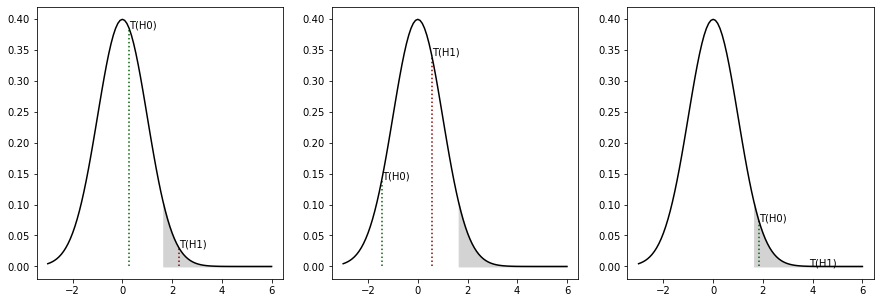

In [400]:
plt.figure(figsize=(15,5))

plt.subplot(131)
test_mean_normal(123)

plt.subplot(132)
test_mean_normal(12) 

plt.subplot(133)
test_mean_normal(18) # alpha %

### Model z rozkładem normalnym i znanym $\sigma^2$ CD

Badana cecha $X$ ma rozkład $N(\mu, \sigma^2)$ ze znaną wartością $\sigma^2$ i nieznaną $\mu$.
Weryfikujemy hipotezę:
$$\left\{\begin{array}{ll}
H_0: & \mu \geq \mu_0 \textrm{ lub } \mu = \mu_0\\
H_1: & \mu < \mu_0
\end{array}\right.$$
W teście używa się statystyki:
$$Z = \sqrt{n}\frac{\bar X - \mu_0}{\sigma}$$
Zbiór krytyczny jest dany za pomocą przedziału: $(-\infty, \mathcal{Z}_{\alpha}]$

----

Badana cecha $X$ ma rozkład $N(\mu, \sigma^2)$ ze znaną wartością $\sigma^2$ i nieznaną $\mu$.
Weryfikujemy hipotezę:
$$\left\{\begin{array}{ll}
H_0: & \mu = \mu_0 \\
H_1: & \mu \neq \mu_0
\end{array}\right.$$
W teście używa się statystyki:
$$Z = \sqrt{n}\frac{\bar X - \mu_0}{\sigma}$$
Zbiór krytyczny jest dany za pomocą przedziału: $(-\infty, \mathcal{Z}_{\alpha/2}] \cup [\mathcal{Z}_{1 - \alpha/2}, +\infty)$

#### Zadanie - test z r.normalnym, znana wariancja

Z populacji, w której badana cecha ma rozkład $N(\mu,\sigma^2=4)$ wylosowano próbkę złożoną z $9$ obserwacji. Na poziomie istotności $\alpha=0.05$ zweryfikować hipotezę 

<ul>
<li> (PD) $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu <2$ </li>
<li> (PD) $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu > 2$ </li>
<li> $H_0$: $\mu=2$ przy hipotezie alternatywnej $H_1$: $\mu \neq 2$ </li>
</ul>

jeżeli średnia z punktów wynosi $\bar X = 1.4$.

Dla każdego z testów policz:
 - wartość statystyki
 - obszar krytyczny
 - p-wartość
 
Następnie narysuj gęstość rozkładu statystyki i zaznacz powyższe punkty na wykresie.

In [26]:
# Pierwszy podpunkt z PD

# liczymy statystykę testową:
z = np.sqrt(9)*(1.4 - 2)/2
print("wartość statystyki: "+str(z))

# p-wartość (pstwo, że otrzymamy mniej pasującą do H_0 wartość statystyki)
rozkladZprzyH0 = stats.norm(0, 1)
# P(Z <= z) (z wyliczone wyżej, Z ~ N(0, 1))
rozkladZprzyH0.cdf(z)
print("p-wartość: "+str(rozkladZprzyH0.cdf(z)))

# wniosek: p-wartość > 0.05, nie ma podstaw do odrzucenia H_0 (na podstawie p-wartości)

# obszar krytyczny
print("obszar krytyczny: ("+str(-np.Inf)+","+str(rozkladZprzyH0.ppf(0.05)),"]")

# jeśli statystyka nie należy do obszaru krytycznego, nie ma podstaw do odrzucenia H_0
# w naszym przykładzie tak jest

wartość statystyki: -0.9000000000000001
p-wartość: 0.18406012534675947
obszar krytyczny: (-inf,-1.6448536269514729 ]


In [29]:
# 3 pkt

# n = 9
# liczymy statystykę testową:
z = np.sqrt(9)*(1.4 - 2)/2
print("wartość statystyki: "+str(z))

# p-wartość (pstwo, że otrzymamy mniej pasującą do H_0 wartość statystyki)
# P(Z <= -|z|) + P(Z >= |z|)  (z wyliczone wyżej, Z ~ N(0, 1))
pval = rozkladZprzyH0.cdf(-abs(z)) + (1 - rozkladZprzyH0.cdf(abs(z)))
print("p-wartość: "+str(pval))

# obszar krytyczny
print("obszar krytyczny: ("+str(-np.Inf)+","+str(rozkladZprzyH0.ppf(0.025))+"] ["
      +str(rozkladZprzyH0.ppf(0.975))+","+str(np.Inf)+")")

# nie ma podstaw do odrzucenia H0,
# - ponieważ p- wartość > alpha
# - ponieważ statystyka testowa nie należy do obszaru krytyczngo

wartość statystyki: -0.9000000000000001
p-wartość: 0.368120250693519
obszar krytyczny: (-inf,-1.9599639845400545] [1.959963984540054,inf)


#### Przykład

Badana cecha X populacji generalnej ma rozkład $N(\mu, \sigma^2)$ przy obu parametrach nieznanych.
Weryfikujemy hipotezę:
$$\left\{\begin{array}{ll}
H_0: & \mu \leq \mu_0 \textrm{ lub } \mu = \mu_0\\
H_1: & \mu > \mu_0
\end{array}\right.$$
W tym teście używa się statystyki
$$t = \sqrt{n}\frac{\bar X - \mu_0}{s}$$
Zbiór krytyczny jest dany za pomocą przedziału: $[t_{1-\alpha, n-1}, +\infty)$
gdzie $t_{1-\alpha, n}$ jest kwantylem rozkładu t-Studenta przy $n$ stopniach swobody
oraz $s^2=\frac{1}{n-1}\sum_{i=1}^n (X_i - \bar X)^2$.

Analogicznie:
 - gdy $H_1: \mu < \mu_0$, to zbiór krytyczny to $(-\infty, t_{\alpha, n-1}]$
 - gdy $H_1: \mu \neq \mu_0$, to zbiór krytyczny to $(-\infty, t_{\alpha/2, n-1}] \cup [t_{1-\alpha/2, n-1}, +\infty)$
 
**Uwaga** $t_{\alpha, n-1} = -t_{1-\alpha, n-1}$, ponieważ rozkład t-Studenta jest symetryczny.

#### Zadanie z treścią - test z r.normalnym, nieznana wariancja

W celu ustalenia, czy dotychczasowa norma okresu użytkowania ubrań ochronnych -- wynosząca $150$ dni -- nie jest zbyt wysoka, zbadano faktyczny okres  użytkowania ich na przykładzie $65$ losowo wybranych robotników pracujących w normalnych warunkach. Otrzymano średnią długość okresu użytkowania $139$ dni oraz odchylenie standardowe ($S$) $9.8$ dni. Zakładając, że czas użytkowania ubrań ma rozkład normalny, stwierdzić, na poziomie istotności $\alpha = 0.01$, czy uzyskane wyniki stanowią podstawę do zmniejszenia normy.

 - sformułuj hipotezę zerową i alternatywną
 - przeprowadź test
 - sformułuj wniosek

 - podpunk 1 
 
 𝐻0: 𝜇=150 przy hipotezie alternatywnej 𝐻1: 𝜇<150

In [31]:
# podpunkt 2+3

# liczymy statystykę testową:
z = np.sqrt(65)*(139 - 150)/9.8
print("wartość statystyki: "+str(z))

# p-wartość (pstwo, że otrzymamy mniej pasującą do H_0 wartość statystyki)
# rozkladZprzyH0 = stats.norm(150, 9.8) uwaga, mamy rozkład t-Studenta
rozkladZprzyH0 = stats.t(65-1)
rozkladZprzyH0.cdf(z)
print("p-wartość: "+str(rozkladZprzyH0.cdf(z)))

# wniosek: p-wartość < 0.01, są podstawy do odrzucenia H_0 (na podstawie p-wartości)
# norma powinna być zmniejszona

# obszar krytyczny
print("obszar krytyczny: ("+str(-np.Inf)+","+str(rozkladZprzyH0.ppf(0.01)),"]")

# statystyka należy do obszaru krytycznego, co daje podstawy do odrzucenia H_0
# norma powinna być zmniejszona


wartość statystyki: -9.049472982784085
p-wartość: 2.3183273789302176e-13
obszar krytyczny: (-inf,-2.386037046069385 ]


#### Zadanie szacowanie bł. I rodzaju

Wygenerujmy $100$ elementową próbkę z rozkładu normalnego ze średnią $7$ i odchyleniem standardowym $3$. 
Załóżmy, że nie znamy wartości $\mu$ i $\sigma$. Zweryfikujmy hipotezę:
$$\left\{\begin{array}{ll}
H_0: & \mu = 7\\
H_1: & \mu \neq 7
\end{array}\right.$$
Skorzystaj z funkcji `stats.ttest_1samp`.

Wykonaj polecenie 10000 razy i policz, ile razy $H_0$ została odrzucona. Na tej podstawie policz, ile wynosi w oszacowaniu błąd I rodzaju?

In [33]:
# generujemy próbkę
X = stats.norm(7, 3)
x = X.rvs(100, random_state=123)

# raz przeprowadzony test:
# popmean=7 - jaka ma być średnia (wartość oczekiwana r.normalnego, "mi") przy H0
stats.ttest_1samp(x, popmean=7) # zwracana jest (statystyka testowa, p-wartość)
# jeśli przyjmiemy alpha = 0.05
# a p-val = 0.8115431736497785
# to nie ma podstaw do odrzucenia hipotezy, bo pval > 0.05

Ttest_1sampResult(statistic=0.2390730368241594, pvalue=0.8115431736497785)

In [34]:
# Wykonaj polecenie 10000 razy i policz, ile razy  H0
# została odrzucona. Na tej podstawie policz, ile wynosi w oszacowaniu błąd I rodzaju?
# alpha = 0.05

alpha = 0.05

p_forH1 = []
for i in range(10000):
    X = stats.norm(7, 3)
    x = X.rvs(100)
    p_val = stats.ttest_1samp(x, popmean=7)
    if p_val[1] < alpha: # porównanie p-wartości z poziomem istotności
        p_forH1.append(p_val[1])

print("H0 została odrzucona {} razy".format(len(p_forH1)))

H0 została odrzucona 520 razy


In [35]:
# wychodzi mniej więcej alpha
len(p_forH1)/10000

0.052

### Jak stosować odpowiednie funckje?

Weźmy test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

Wybraliśmy `binom_test`.

1) Należy ustalić jak brzmi hipoteza zerowa i alternatywna

Perform a **test that the probability of success is p.**

This is an exact, **two-sided test** of the null hypothesis that the probability of success in a Bernoulli experiment is p.

Mamy próbkę $X_1, X_2, ..., X_n$ z rozkładu Bernouuliego o nieznanym parametrze $p$. Chcemy testować:

$$H_0: p = p_0$$

$$H_1: p \neq p_0$$

2) Parametry funkcji

`scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')`

 - `x` - The number of successes, or if x has length 2, it is the number of successes and the number of failures.
 - `n` - The number of trials. This is ignored if x gives both the number of successes and failures.
 - `p` - The hypothesized probability of success. 0 <= p <= 1. The default value is p = 0.5.
 
3) Dopasowanie testu do problemu i danych

In [36]:
# nasze dane
x = np.loadtxt("test.txt")
print(x)
# dane dotyczą rzutu monetą
# 1 oznacza orzeł, 0 reszka

# Problem: Czy na podstawie próbki na poziomie istotności 0.05 możemy pokazać, że moneta może nie być uczciwa?

[0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1.]


$H_0: p = 0.5$ - moneta jest uczciwa

$H_1: p \neq 0.5$ - moneta nieuczciwa

In [38]:
n_orlow = np.count_nonzero(x)
n_reszek = len(x) - n_orlow

4) Przetestowanie

In [39]:
stats.binom_test(x=[n_orlow, n_reszek], p=0.5) # zwracana jest p-wartość

0.08862608011406754

5) Wnioski

Na poziomie ufności 0.05 nie możemy odrzucić hipotezy, że moneta jest uczciwa, bo $0.089 > 0.05$.

#### Zadanie

Chcemy ocenić czy konkretne ćwiczenia sportowe pomagają młodym sportowcom w osiąganym wynikach. W tabeli `sport1.csv` zawarte są czasy biegów na 100m tysiąca osób przed (kolumna X) i po (kolumna Y) wykonaniu ćwiczeń. Sprawdź, czy na poziomie ufności $\alpha = 0.05$ można powiedzieć, że ich wyniki zmieniły się po wykonaniu ćwiczeń.

 - dobierz odpowiedni test: https://docs.scipy.org/doc/scipy/reference/stats.html -> Statistical tests (podpowiedź, szukaj wśród testów t)
 - przeczytaj dokumentację
 - zapisz obie hipotezy
 - przeprowadź test i wyciągnij wnioski.

`stats.ttest_rel`

$(X_1, Y_1), (X_2, Y_2), ..., (X_n, Y_n)$

$X_i$ - wynik przed ćwiczeniami i-tego zawodnika

$Y_i$ - wynik po ćwiczeniach i-tego zawodnika

H0: $\mu_X = \mu_Y$

H1: $\mu_X \neq \mu_Y$ *This is a two-sided test for the null hypothesis*

In [56]:
scores = pd.read_csv("sport01.csv")
scores
alpha = 0.05
n = 1000

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel
# This is a two-sided test for the null hypothesis that 2 related or repeated samples
# have identical average (expected) values.

# H0: 𝜇x = 𝜇y, przy hipotezie alternatywnej H1: 𝜇x != 𝜇y

stats.ttest_rel(scores.X, scores.Y)


Ttest_relResult(statistic=-0.4601264166281449, pvalue=0.645525611404588)

#### Zadanie

Zrób to samo, co wyżej dla tabeli `sport2.csv`.

In [14]:
scores = pd.read_csv("sport02.csv")
stats.ttest_rel(scores.X, scores.Y)
# małe p-val - na poziomie ufności 0.05 odrzucamy hipotezę zerową
# 

Ttest_relResult(statistic=2.225709485251926, pvalue=0.02625617085742352)

## Jak sprawdzić, czy rozkład jest normalny

Często do stosowania różnych procedur statystycznych potrzebujemy informacji, czy rozkład jest (w przybliżeniu) normalny. 

### Wykres kwantylowy

Wykres kwantylowy jest graficzną metodą testowania zgodności danych empirycznych z rozkładem teoretycznym. 

Wartości na osi x to kwantyle empiryczne policzone na podstawie próbki, zaś na osi y są to wartości teoretyczne kwantyli dla odpowiedniego rozkładu liczone w odpowiadających kwantylom empirycznym punktach.

Jeśli punkty leżą na prostej - rozkład empiryczny jest bliski teoretycznemu.

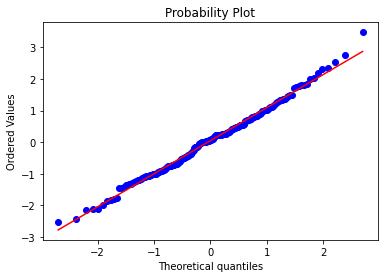

In [50]:
X = stats.norm()
x = X.rvs(200)

stats.probplot(x, dist="norm", plot = plt)
plt.show()

#### Zadanie 

Wylosuj próbkę $200$ elementową z 
 - rozkładu t- Studenta o 5 i 50 stopniach swobody
 - rozkładu dwumianowego o prawdopodopodobieństwie sukcesu p=0.5 i n=100
 - rozkładu wykładniczego z parametrem $\lambda = 3$
 
Narysuj wykresy kwantylowe (porównujące podane wykresy z rozkładem normalnym).

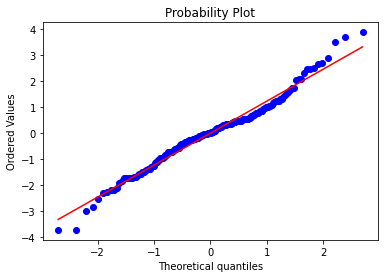

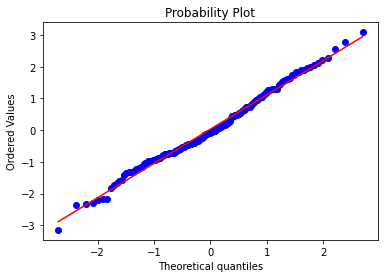

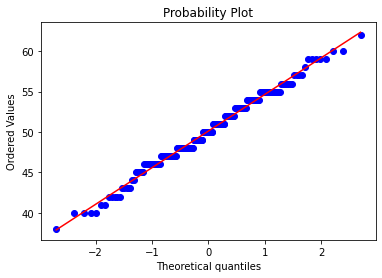

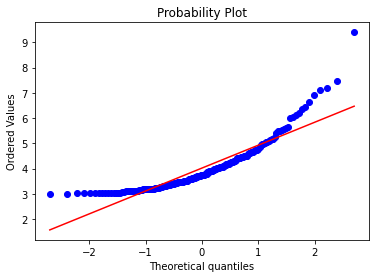

In [51]:
x_t = stats.t(5).rvs(200)
x_t50 = stats.t(50).rvs(200)
x_binom = stats.binom(100, 0.5).rvs(200)
x_exp = stats.expon(3).rvs(200)

plt.figure()
stats.probplot(x_t, dist="norm", plot = plt)

plt.figure()
stats.probplot(x_t50, dist="norm", plot = plt)

plt.figure()
stats.probplot(x_binom, dist='norm', plot = plt)

plt.figure()
stats.probplot(x_exp, dist="norm", plot = plt)

plt.show()


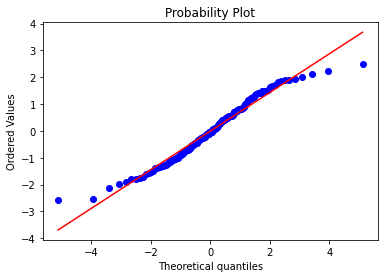

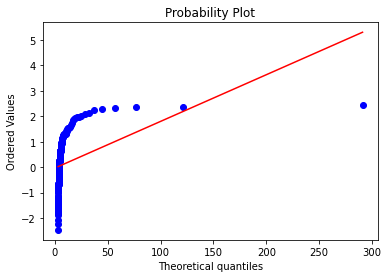

In [52]:
# porównujemy rozkład normalny z innym rozkładem niż normalny

X = stats.norm()
x = X.rvs(200)
stats.probplot(x, dist="t", sparams=(4), plot = plt) # t -student o 4 stopniach swobody
plt.show()

X = stats.norm()
x = X.rvs(200)
stats.probplot(x, dist="pareto", sparams=(1,2), plot = plt)
plt.show()

### Testowanie normalności

W testach dotyczących normalności mogą pojawić się różne wyzwania:
czasami może być dostępnych tylko kilka próbek,
czasami danych jest bardzo dużo,
niektóre zawierają bardzo dużo wartości odstających.

Aby sprostać różnym sytuacjom opracowano różne testy normalności.
Można je podzielić na dwie kategorie:

 - Testy w oparciu o porównanie ("najlepsze dopasowanie") z danym
rozkładem, częstookreślane w kategoriach dystrybuanty (CDF).
Przykładami są: test Kołmogorowa-Smirnowa, test Lillieforsa, test
Andersona Darlinga, kryterium Cramera-von Misesa, testy
Shapiro-Wilka i Shapiro-Francia.

 - Testy oparte na statystykach opisowych próbki. Przykładami są: test
skośności, test kurtozy, test D'Agostino-Pearsona i test Jarque-Bera.

We wszystkich testach, których będziemy używać poniżej, hipotezy są następujące:

H0 : Próba pochodzi z populacji o rozkładzie normalnym
    
H1 : Próba nie pochodzi z populacji o rozkładzie normalnym.

Czyli gdy p-wartość jest mała, jest to sygnał, że rozkład może nie być normalny.

#### Test Shapiro-Wilka

Jeden z najbardziej popularnych testów na normalność rozkładu. Powstał w 1965 roku.

In [460]:
# losuję próbkę z rozkładu normalnego

X = stats.norm(0,1)
x = X.rvs(500, random_state=123)

print(stats.normaltest(x)) # D'Agostino and Pearson's
print(stats.shapiro(x))
print(stats.kstest((x-np.mean(x))/np.std(x, ddof=1), 'norm'))
# nie mamy podstaw twierdzić, że próbka nie pochodzi z r. normalnego

NormaltestResult(statistic=0.2748010840591904, pvalue=0.8716210353454495)
(0.9611964225769043, 0.5680192112922668)
KstestResult(statistic=0.16716131435157677, pvalue=0.5881695929461959)


#### Zadanie 

Wylosuj próbkę z rozkładu normalnego o liczności $n=20$ i $n=100$ następnie przeprowadź powyższe testy. Czy któryś test odrzucił hipotezę zerową?

In [53]:
X = stats.norm(0,1)
x1 = X.rvs(20)
x2 = X.rvs(100)

print("Testy dla próbki n = 20:")
print(stats.normaltest(x1))
print(stats.shapiro(x1))
print(stats.kstest((x1-np.mean(x1))/np.std(x1, ddof=1), 'norm'))

print("\nTesty dla próbki n = 100:")
print(stats.normaltest(x2)) 
print(stats.shapiro(x2))
print(stats.kstest((x2-np.mean(x2))/np.std(x, ddof=1), 'norm'))

Testy dla próbki n = 20:
NormaltestResult(statistic=0.3145911990064623, pvalue=0.8544514460604311)
(0.9834988713264465, 0.9709277749061584)
KstestResult(statistic=0.08437135350243341, pvalue=0.9988543951325384)

Testy dla próbki n = 100:
NormaltestResult(statistic=1.286615568752351, pvalue=0.5255511358916767)
(0.9846582412719727, 0.2999938428401947)
KstestResult(statistic=0.09496544764703801, pvalue=0.30926442670624077)


#### Zadanie 

Wylosuj próbkę z rozkładu t-Studenta o 10 stopniach swobody o $n=100$ następnie przeprowadź powyższe testy. Czy któryś test odrzucił hipotezę zerową?

Powtórz dla rozkładu t-Studenta o 3 stopniach swobody.

In [54]:
X1 = stats.t(10)
x1 = X1.rvs(100)

print("==> Testy dla próbki o 10 st. swobody:")
print(stats.normaltest(x1)) 
print(stats.shapiro(x1))
print(stats.kstest((x1-np.mean(x1))/np.std(x1, ddof=1), 'norm'))

X2 = stats.t(3)
x2 = X2.rvs(100)

print("\n==> Testy dla próbki o 3 st. swobody:")
print(stats.normaltest(x2)) 
print(stats.shapiro(x2))
print(stats.kstest((x2-np.mean(x2))/np.std(x2, ddof=1), 'norm'))


==> Testy dla próbki o 10 st. swobody:
NormaltestResult(statistic=3.7825804208859504, pvalue=0.15087702009722484)
(0.9763022065162659, 0.06824692338705063)
KstestResult(statistic=0.06374749650474576, pvalue=0.8111294524311369)

==> Testy dla próbki o 3 st. swobody:
NormaltestResult(statistic=51.0371450273627, pvalue=8.268462693762186e-12)
(0.7577162981033325, 1.5049595250560266e-11)
KstestResult(statistic=0.19182259817356573, pvalue=0.00107016996037812)


In [55]:
X2 = stats.t(3)
x2 = X2.rvs(20)

print("\n==> Testy dla próbki o 3 st. swobody:")
print(stats.normaltest(x2)) 
print(stats.shapiro(x2))
print(stats.kstest((x2-np.mean(x2))/np.std(x2, ddof=1), 'norm'))


==> Testy dla próbki o 3 st. swobody:
NormaltestResult(statistic=0.34903037416139854, pvalue=0.8398640990485051)
(0.9781394004821777, 0.9078754186630249)
KstestResult(statistic=0.0880012311110393, pvalue=0.9977879276900418)


In [ ]:
np.std(x2, ddof=1) #1/n // 1/(n-1)